In [4]:
import os
import numpy as np
import xarray as xr
import pandas as pd
import matplotlib.pyplot as plt

import cartopy.crs as ccrs
import cartopy.feature as cfeature
import matplotlib.pyplot as plt

import fates_calibration_library.ilamb_functions as ilamb
import fates_calibration_library.plotting_functions as plotting
import fates_calibration_library.utils as utils

In [25]:
# ilamb observations
ilamb_config_file = '/glade/work/afoster/FATES_calibration/fates_calibration_library/configs/ilamb_conversion.yaml'
ilamb_config = utils.get_config_file(ilamb_config_file)
ilamb_obs = xr.open_dataset('/glade/work/afoster/FATES_calibration/observations/all_ILAMB_obs.nc')

In [61]:
def quick_map(dat, cmap, vmin=None, vmax=None, add_coasts=False):
    figure, ax = plt.subplots(
        1,
        1,
        figsize=(13, 6),
        subplot_kw=dict(projection=ccrs.Robinson()),
        layout="compressed",
    )
    if add_coasts:
       ax.coastlines()
       ax.add_feature(
           cfeature.NaturalEarthFeature("physical", "ocean", "110m", facecolor="gray")
       )
    # plot the color mesh
    pcm = ax.pcolormesh(
        dat.lon,
        dat.lat,
        dat,
        transform=ccrs.PlateCarree(),
        shading="auto",
        cmap=cmap,
        vmin=vmin,
        vmax=vmax,
    )
    figure.colorbar(pcm, ax=ax, fraction=0.03, orientation="horizontal")

def quick_plot(da, label):
    plt.figure(figsize=(7, 5))
    ax = plt.subplot(111)
    # add gridlines
    plt.grid(
        True,
        which="both",
        axis="both",
        linestyle="--",
        linewidth=0.5,
        color="black",
        alpha=0.3,
    )
    plt.plot(da.month, da, label=label, c='gray')
    plt.legend()

In [47]:
import importlib
importlib.reload(ilamb)

<module 'fates_calibration_library.ilamb_functions' from '/glade/work/afoster/FATES_calibration/fates_calibration_library/fates_calibration_library/ilamb_functions.py'>

In [182]:
obs_var = 'FSR'
model = 'CERESed4.2'

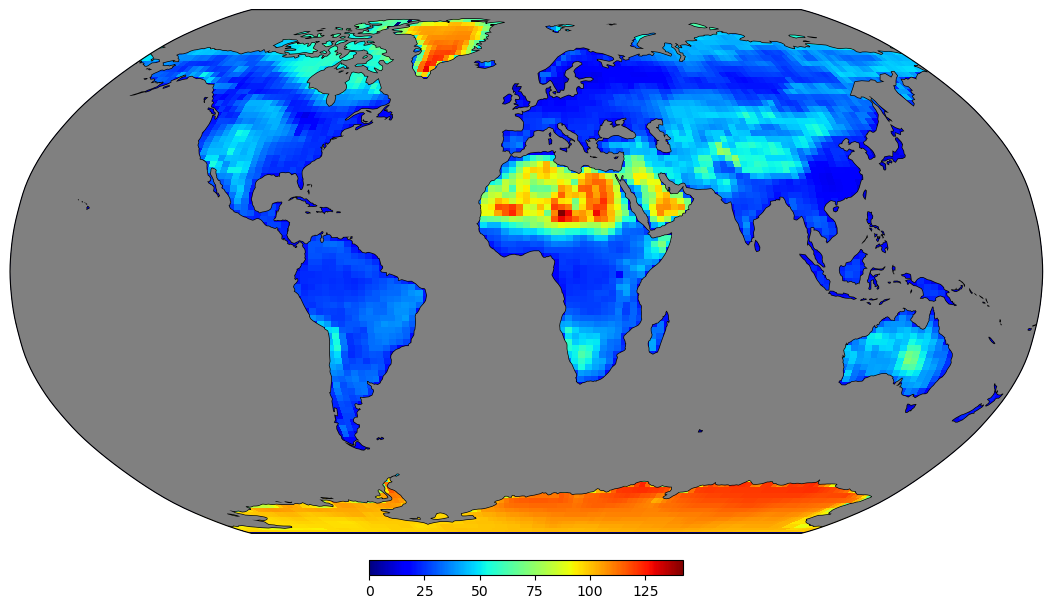

In [183]:
ilamb_var = ilamb.get_model_da(ilamb_obs, ilamb_config[obs_var]['var'],
                               ilamb_config[obs_var]['models']).sel(model=model)
ilamb_var = ilamb_var.dropna(dim='year', how='all')
quick_map(ilamb_var.mean(dim='year'), 'jet',add_coasts=True)

In [184]:
ilamb_glob = ilamb.get_model_da(ilamb_obs, f"{ilamb_config[obs_var]['var']}_global",
                               ilamb_config[obs_var]['models']).sel(model=model)
ilamb_glob = ilamb_glob.dropna(dim='year', how='all')
ilamb_glob.mean(dim='year')

<xarray.DataArray 'fsr_global' ()>
array(37.15621632)
Coordinates:
    model    <U13 'CERESed4.2'

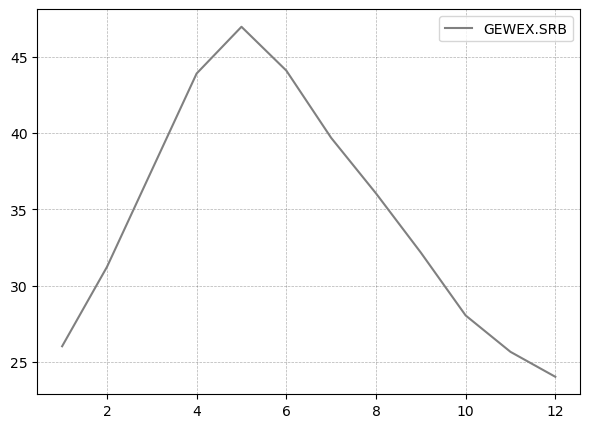

In [179]:
ilamb_clim = ilamb.get_model_da(ilamb_obs, f"{ilamb_config[obs_var]['var']}_cycle",
                               ilamb_config[obs_var]['models']).sel(model=model)
quick_plot(ilamb_clim, model)